In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from scipy.ndimage import median_filter
from matplotlib.colors import Normalize
import Polarisation
import PIV_postprocessing

# Part 1

# Load PIV file data and image data. 

Given file path load data. 

In [3]:
# PIV data.

# h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/piv_cut1/frame_1_to_375/"
h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/piv_cut1(2)/subregion_all_frame/"
with h5py.File(h5_file_path+"U_matrix", "r") as h5f:
    U = h5f["matrix"][:] # shape: frame, rows, columns 

with h5py.File(h5_file_path+"V_matrix", "r") as h5f:
    V = h5f["matrix"][:]

with h5py.File(h5_file_path+"M_matrix", "r") as h5f:
    M = h5f["matrix"][:]

with h5py.File(h5_file_path+"xgrid_matrix", "r") as h5f:
    xgrid = h5f["matrix"][:]

with h5py.File(h5_file_path+"ygrid_matrix", "r") as h5f:
    ygrid = h5f["matrix"][:]

In [3]:
# Image data.

# open .h5 file for aggregate images and original red beads images
aggregate_file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1.h5" 

with h5py.File(aggregate_file_path, "r") as h5f:
    aggregate = h5f["green"][:]
    red_beads = h5f["red"][:]

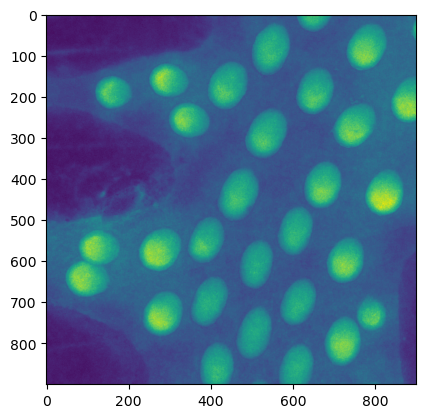

In [4]:
# Show a later stage of the tissue.abs 
plt.imshow(aggregate[300])

# Generate Rose plot.

After determine the center of aggregates and the reference vector components, generate rose plots. 
Only need to change the center ([y, x]), x and y components of reference vector, the length of red line in rose plot (reference_length), and the name of image (img_name)!. 

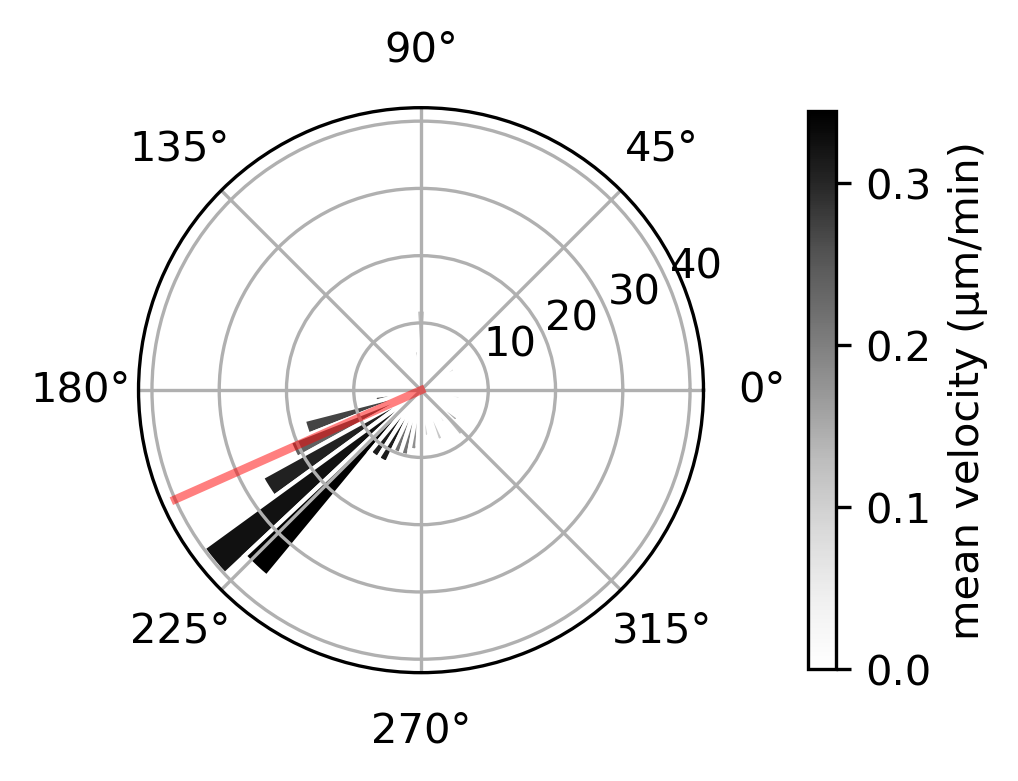

In [4]:
# Function components: rose_plot(center, x, y, dist, reference_length, t0, t1, 
                                    # pxl_conversion, time_conversion, img_name)

PIV_postprocessing.rose_plot([530, 100], -0.9, -0.4, 100, 40, 0, np.shape(U)[0], 1.8, 15, xgrid, ygrid, U, V, "h1_new_ref.svg")

# Generate velocity profile.

Given the center and reference vector components, generate the graph with velocity and dot product lines. 

Also note the frame number (under the image) where the maximum velocity is taken!

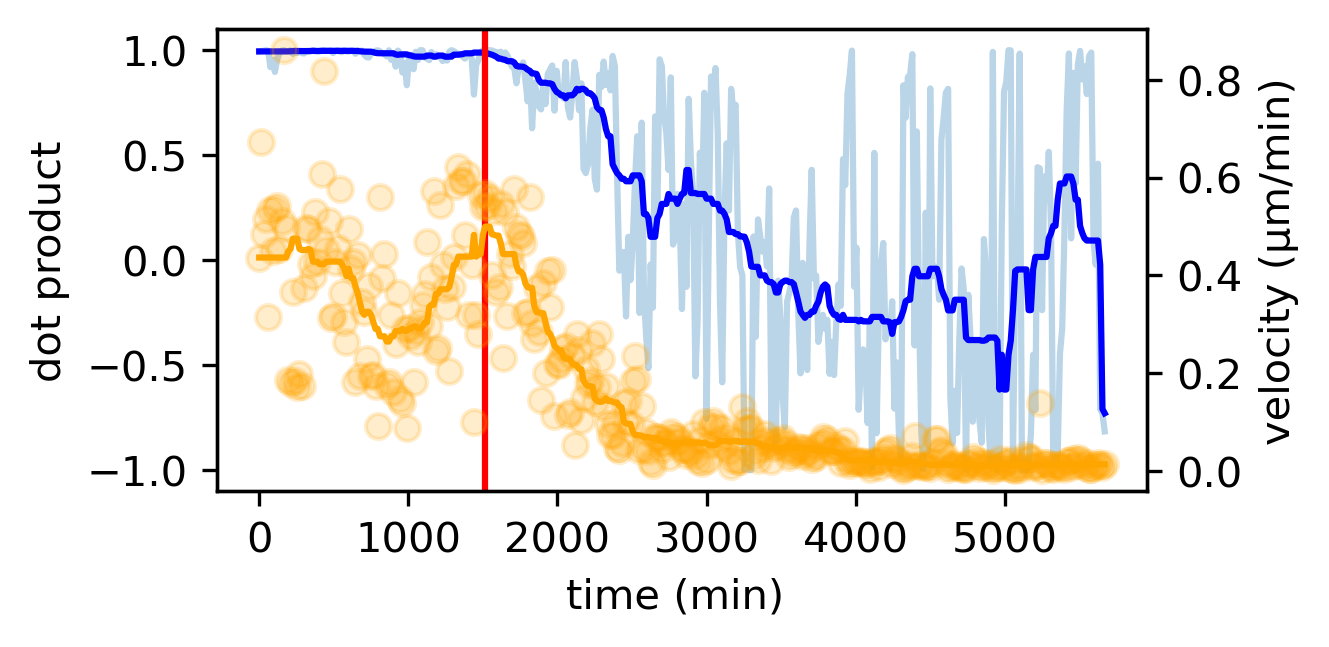

101

In [6]:
# Function components:angle_velocity_plot(center, x, y, pxl_conversion, time_conversion)

PIV_postprocessing.angle_velocity_plot([1100, 480], 7, 10, 1.8, 15)

# Part 2

# Single Aggregate Extraction.

Extract manually the subregion/single aggregate region. Save the image data in .h5 file. 

Possible visualisation of single aggregate development with video. 

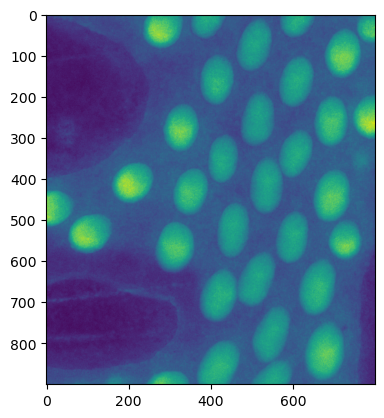

In [7]:
# Extract the data information.
h5_file_path = "F:/PhD_Franziska/Headon/RedBeads/subregion_cut1(2).h5"
with h5py.File(h5_file_path, "r") as h5f:
    green_channel = h5f["green"][:]
    red_channel = h5f["red"][:]

# Visualisation 
plt.imshow(green_channel[300])

### Manually extract single aggregate.

In [8]:
def extract_single_aggregate(channel):
    # Extract information from the dataset with given channel. 
    # Extract the image information for al frames. 
    aggregate = []
    for i in range(np.shape(channel)[0]):
        aggregate.append(channel[i][460:590, 40:160]) # Manually fit the region of aggregate!
    return np.array(aggregate)

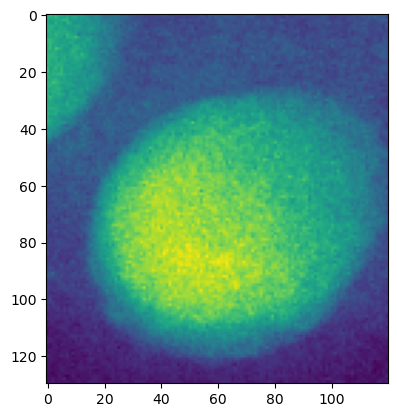

In [9]:
# Generate the subregion of images. 
aggregate = extract_single_aggregate(green_channel)
np.shape(aggregate) # (number of frames, y coordinate, x coordinate) dimensional 

# Save the all frames of subregion into .h5 file. 
h5_file_path = "single_aggregate_cut1(2)_h1.h5"
with h5py.File(h5_file_path, "w") as h5f:
     h5f.create_dataset("green", data = aggregate)

# The aggregate image at different time point. 
plt.imshow(aggregate[300])

# Circle Mask.

Cut a circle on the single aggregate. Should mostly reflect the polarisation process in spite of possible displacement of aggregates. 

In [10]:
# Load data. 

# Red in the single aggregate subregion image. (could for example be generated with capture "single aggregate extraction").
h5_file_path = "F:/PhD_Franziska/Headon/Polarisatioin/single_aggregate_cut1_h2.h5"
with h5py.File(h5_file_path, "r") as h5f:
    single_aggregate = h5f["green"][:]

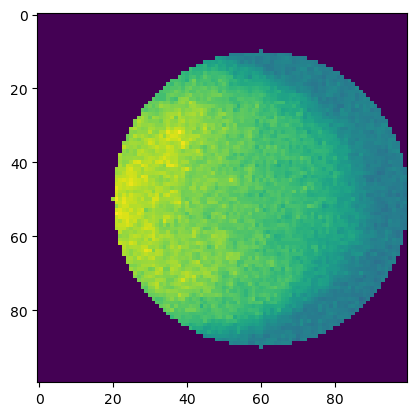

In [11]:
# Function for cutting circle: circle_mask(center_x, center_y, radius, img)

circle_region = Polarisation.circle_mask(60, 50, 40, single_aggregate[300]) # x, y, and radius of circle. And the image that is cut.
plt.imshow(circle_region)

# Calculation of reference polarisation vector with polarisation score function. 
Two different ways: one only looks one frame and the other the mean over a time period. 

Useful for the angular rose plot applying reference polarisation vector. 

In [ ]:
# Only take the 300th frame for determination of reference polarisation vector. 
Polarisation.one_frame_ref_pol_vec(50, 50, 40, 300, single_aggregate)

# Take a series of frames and take the mean polarisation vector as final reference polarisation vector. 
Polarisation.mean_reference_polarisation_vector(290, 310, 50, 50, 40, single_aggregate)

# Visualisation of Polarisation Score. 

Given the center and radius of circle masks to calcualte the polarisation score on it. In the parameter "maxi_velocity_frame" should be the frame number with maximal velocity, which is noted above under "Create velocity profile". 

Also determine the value from the first plateau to normalise the polarisation score, while keeping the qualitative dynamics. 

In [12]:
# The polarisation score at all time point. 

Polarisation.temperal_polarisation(single_aggregate, 50, 50, 40, 15)

array([ 11102.00325019,  11426.09040744,  10390.62338697,   9414.85865177,
         7357.27413828,   4404.49218724,  11221.67738086,   8962.86746191,
         8780.2138052 ,   5643.2746748 ,   3847.4453166 ,   4312.9962002 ,
         1455.95293618,   1626.71556074,   3731.79742275,   4771.51564743,
         9055.68673644,   9064.75379858,   8715.6722799 ,  12236.74074194,
        10133.08801203,   8635.18830383,   6966.32293992,   6559.93698011,
         9423.26803337,   5189.48646815,   7498.33189642,   7784.88543895,
         8743.83809581,   7421.64042135,   9211.24167339,  10708.46964658,
         8386.10615196,   6338.8124456 ,   8978.5686585 ,   7557.05807091,
         7670.25940184,   9123.7023774 ,   7028.83109364,   4576.77574734,
         3634.12120409,   7373.13105214,   4893.37267351,   7224.98119   ,
         9789.3512482 ,  14616.70993276,  12698.03591052,  10280.99022043,
        11881.97663893,  11634.0001753 ,  11339.46960333,  12584.12501384,
        10397.71759327,  

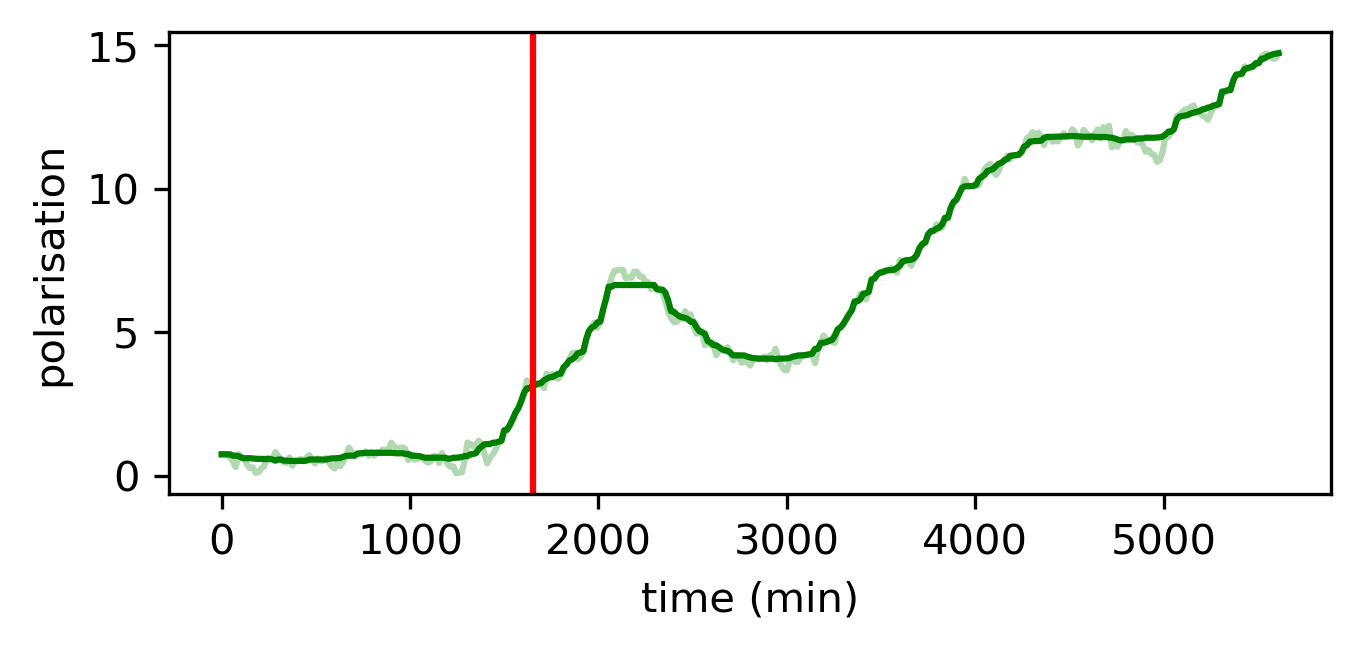

In [13]:
# Plot the polarisation score.

Polarisation.normalisation_polarisation_score(single_aggregate, 50, 50, 40, 15, 110, 15000)